In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#pip install efficientnet

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir='C:/Users/Admin/Desktop/3project/lung diseases/A Contemporary Technique for Lung Disease Prediction using Deep Learning/model/train'
test_dir='C:/Users/Admin/Desktop/3project/lung diseases/A Contemporary Technique for Lung Disease Prediction using Deep Learning/model/test'

In [6]:
batch_size = 1
epochs = 15
img_height = 180
img_width = 180

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 771 images belonging to 4 classes.


In [8]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 304 images belonging to 4 classes.


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50, VGG19, MobileNetV2

In [10]:
 base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [11]:
base_model.trainable = False

In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [13]:
classifier=tf.keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(4,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 4)                 51204     
                                                                 
Total params: 14,765,892
Trainable params: 51,204
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = classifier.fit(train_data_gen, epochs=3,
validation_data= val_data_gen,)

Epoch 1/3
771/771 [==============================] - 117s 149ms/step - loss: 0.6669 - accuracy: 0.8016 - val_loss: 0.1437 - val_accuracy: 0.9441
Epoch 2/3
771/771 [==============================] - 102s 132ms/step - loss: 0.2556 - accuracy: 0.9118 - val_loss: 1.1609 - val_accuracy: 0.7961
Epoch 3/3
771/771 [==============================] - 121s 157ms/step - loss: 0.2051 - accuracy: 0.9300 - val_loss: 0.2401 - val_accuracy: 0.9145


In [16]:
classifier.save('lung.h5')

In [17]:
#pip install Pillow

In [18]:
import numpy as np

In [19]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

304/304 - 30s - 30s/epoch - 97ms/step


In [20]:
import matplotlib.pyplot as plt

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [23]:
cm_plot_labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

Confusion matrix, without normalization
[[96  0  0  0]
 [ 0 84 12  0]
 [ 0  1 63  0]
 [13  0  0 35]]
Accuracy: 0.914
Precision: 0.919
Recall: 0.914
F-Measure: 0.914


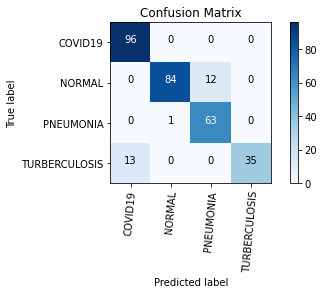

In [24]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred